## imports

In [64]:
from useful_scit.imps import *
import flexpart_management.modules.FlexLogPol as FlexLogPol
import flexpart_management.modules.constants as co
import flexpart_management.modules.flx_array as fa
import funs
mpl.rcParams['figure.dpi'] = 150

In [65]:
log.ger.setLevel(log.log.ERROR)

# Code

In [2]:
path = '/Volumes/mbProD/Downloads/flx_log_coor/run_2019-08-18_18-46-19_'
# flp = FLP.FlexLogPol(path,concat=True)
# selfFLP = FLP.FlexLogPol(path,concat=False)
selfFLP = FlexLogPol.FlexLogPol(
    path,
    #concat=True,
    concat=False,
    get_clusters=False,
    open_merged=True,
    clusters_avail=False
)

'using vol for conc'


In [3]:
selfFLP.reset_z_levels()

'using vol for conc'


In [14]:
selfFLP.add_topo_to_merge_ds()

2019-09-13 12:29:35,435 root         DEBUG    heads got
2019-09-13 12:29:35,451 root         DEBUG    merge pol heads got


In [15]:
selfFLP.merged_ds

<xarray.Dataset>
Dimensions:        (R_CENTER: 36, TH_CENTER: 36, ZMID: 6, releases: 3864)
Coordinates:
  * R_CENTER       (R_CENTER) float64 0.05613 0.06721 0.08046 ... 25.53 30.57
  * releases       (releases) datetime64[ns] 2017-12-06 ... 2018-05-16T23:00:00
  * TH_CENTER      (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 6.021 6.196
    LAT            (R_CENTER, TH_CENTER) float64 -16.29 -16.3 ... 13.18 14.1
    LON            (R_CENTER, TH_CENTER) float64 -68.08 -68.08 ... -38.6 -37.68
    LAT_00         (R_CENTER, TH_CENTER) float64 -16.3 -16.3 ... 9.903 11.16
    LON_00         (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -77.69 -72.98
    LAT_10         (R_CENTER, TH_CENTER) float64 -16.29 -16.29 ... 15.08 16.59
    LON_10         (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -79.57 -73.94
    LAT_11         (R_CENTER, TH_CENTER) float64 -16.29 -16.29 ... 16.59 17.1
    LON_11         (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -73.94 -68.13
    LAT_01         (R_CENTE

In [24]:
merged_ds = selfFLP.merged_ds

In [16]:
dsF= selfFLP.filter_hours_with_few_mea()

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/missing.py:207: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  keep_attrs=True).transpose(*self.dims)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/missing.py:207: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  keep_attrs=True).transpose(*self.dims)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/missing.py:207: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  keep_attrs=True).transpose(*self.dims)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/missing.py:207: Fu

In [27]:
co.FILTER = 'FILTER'
_ds1 = dsF.expand_dims(dim={co.FILTER:['filter_few']})

In [28]:
co.FILTER = 'FILTER'
_ds2 = merged_ds.expand_dims(dim={co.FILTER:['original']})

In [30]:
_ds3 = xr.merge([_ds1,_ds2])

In [31]:
_ds3

<xarray.Dataset>
Dimensions:        (FILTER: 2, R_CENTER: 36, TH_CENTER: 36, ZMID: 6, releases: 3888)
Coordinates:
  * FILTER         (FILTER) object 'filter_few' 'original'
  * releases       (releases) datetime64[ns] 2017-12-06 ... 2018-05-16T23:00:00
  * R_CENTER       (R_CENTER) float64 0.05613 0.06721 0.08046 ... 25.53 30.57
  * TH_CENTER      (TH_CENTER) float64 0.08727 0.2618 0.4363 ... 6.021 6.196
    LON            (R_CENTER, TH_CENTER) float64 -68.08 -68.08 ... -38.6 -37.68
    LAT_00         (R_CENTER, TH_CENTER) float64 -16.3 -16.3 ... 9.903 11.16
    LON_00         (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -77.69 -72.98
    LAT_10         (R_CENTER, TH_CENTER) float64 -16.29 -16.29 ... 15.08 16.59
    LON_10         (R_CENTER, TH_CENTER) float64 -68.13 -68.12 ... -79.57 -73.94
    LAT_11         (R_CENTER, TH_CENTER) float64 -16.29 -16.29 ... 16.59 17.1
    LON_11         (R_CENTER, TH_CENTER) float64 -68.12 -68.11 ... -73.94 -68.13
    LAT_01         (R_CENTER, TH_C

In [33]:
_dsSM = FlexLogPol.smooth_merged_ds(_ds3.sel(**{co.FILTER:'filter_few'}))

(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)
(3888, 6, 35, 36)


In [49]:
_dsSM1 = _dsSM.drop(co.FILTER).expand_dims(dim={co.FILTER:['filter_few_smooth']})

In [50]:
_ds4 = xr.concat([_ds3,_dsSM1],dim=co.FILTER)

In [53]:
_cp = selfFLP.coarsen_par

In [56]:
_da = _ds4[co.CONC].loc[{co.FILTER:'filter_few_smooth'}]

In [90]:
_da1 = _da.coarsen(**{co.RL:_cp}).mean()

In [129]:
co.RLC = 'releases_coarsen'
co.CONC_COARS = 'CONC_COARSEN'
_da2 = _da1.rename({co.RL:co.RLC}).drop(co.FILTER).expand_dims(dim={co.FILTER:['filter_few_smooth_coarse']})
_da2.name = co.CONC_COARS

In [130]:
_da3 = _da2.dropna(co.RLC,how='all').dropna(co.ZM,how='all').dropna(co.R_CENTER,how='all').dropna(co.TH_CENTER,how='all')

In [131]:
_dst = _ds4[{co.R_CENTER:slice(None,3),co.TH_CENTER:slice(None,4),co.ZM:slice(None,5),co.RL:slice(None,10)}]

In [132]:
_dat = _da3[{co.R_CENTER:slice(None,3),co.TH_CENTER:slice(None,4),co.ZM:slice(None,5),co.RLC:slice(None,9)}]

In [159]:
# xr.merge([_dst,_dat]).sel(**{co.FILTER:'filter_few_smooth_coarse'})
_dsm=xr.merge([_ds4,_da3])

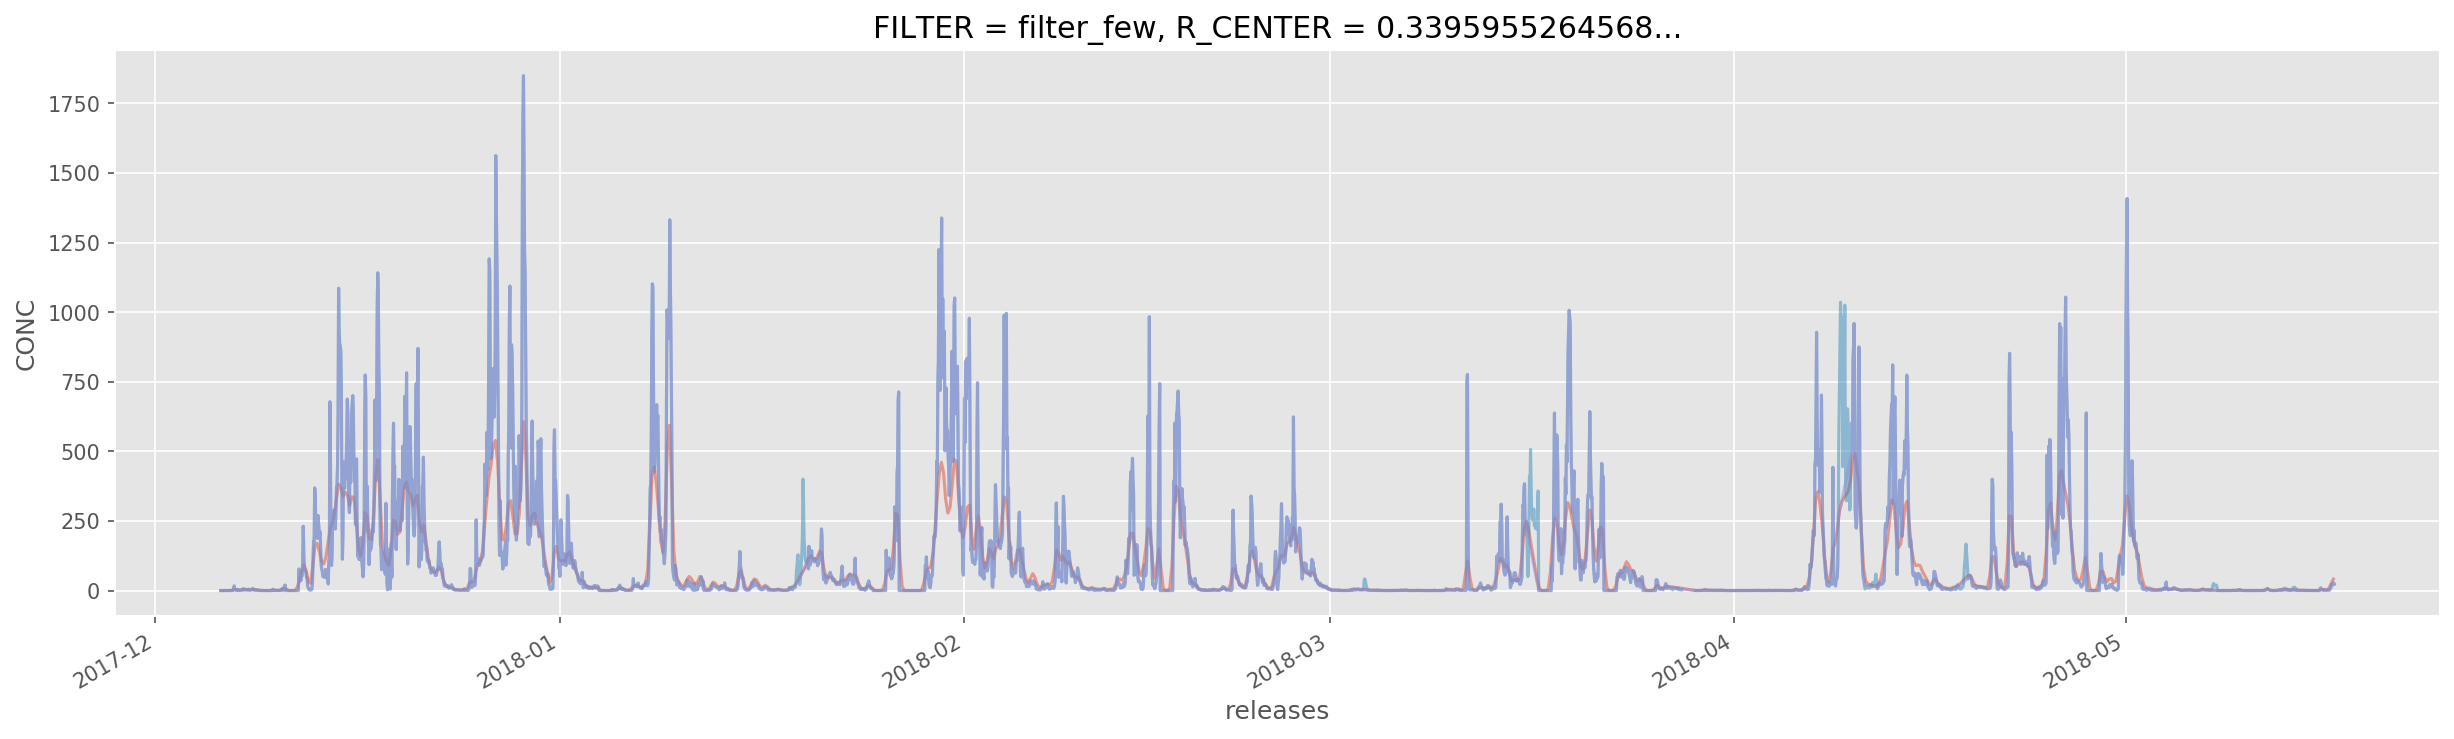

In [178]:
fig,ax = plt.subplots(figsize=(20,5))

_dsm[co.CONC_COARS].sel(**{co.FILTER:'filter_few_smooth_coarse'})[:,2,10,8].plot(ax=ax,label=co.CONC_COARS,alpha=.5)

_dsm[co.CONC].sel(**{co.FILTER:'original'})[:,2,10,8].plot(ax=ax,label=co.CONC,alpha=.5)
_dsm[co.CONC].sel(**{co.FILTER:'filter_few'})[:,2,10,8].plot(ax=ax,label=co.CONC,alpha=.5)

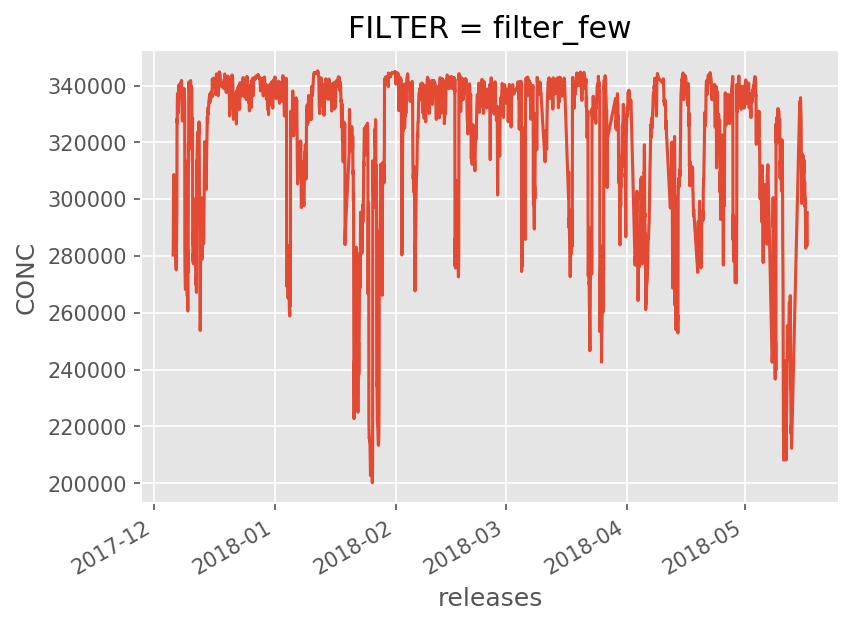

In [181]:
_dsm[co.CONC].sel(**{co.FILTER:'filter_few'}).sum([co.ZM,co.R_CENTER,co.TH_CENTER]).plot()

In [174]:
ax.legend()

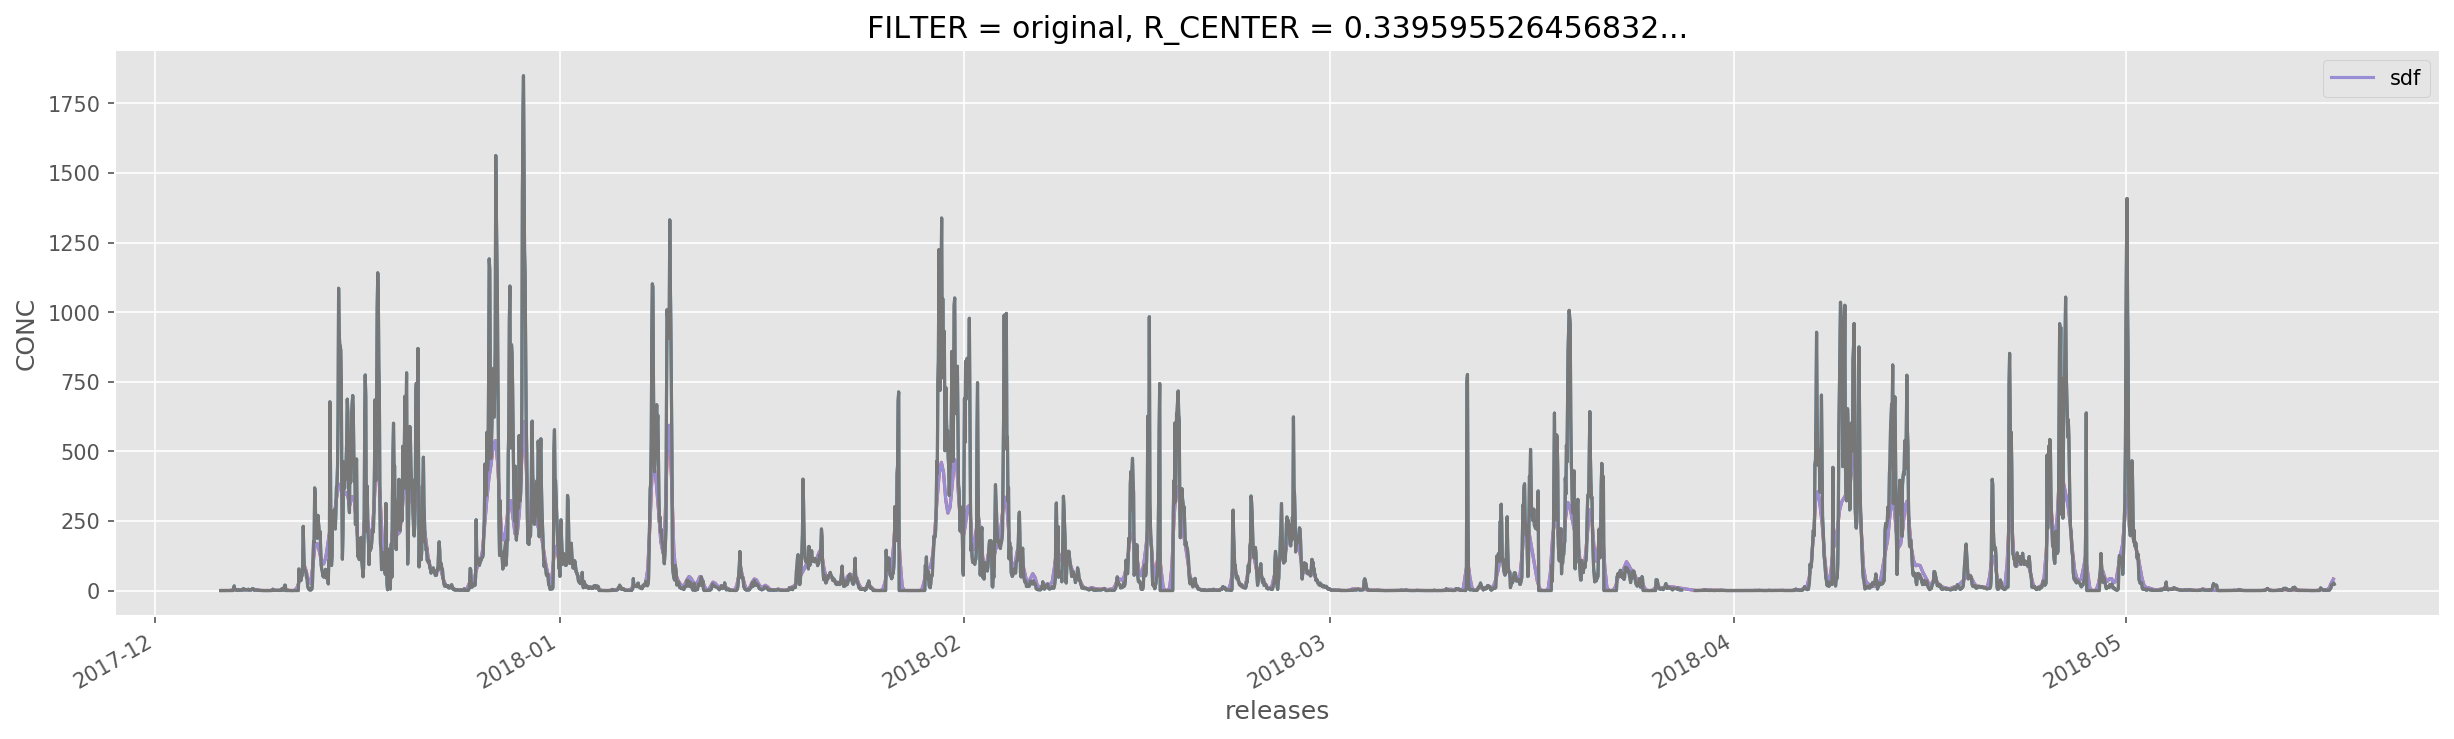

In [176]:
ax.figure